1. Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.datasets import load_diabetes

In [2]:
X, y = load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

In [3]:
def gb_predict(X, trees_list, eta):        
    predictions = np.array(
        [sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X]
    )
    return predictions

In [4]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [5]:
def residual(y, z):
    return - (z - y)

In [6]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, residual(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [15]:
%%time
# Число деревьев в ансамбле
n_trees_list = [5, 10, 25, 50, 75, 100]

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 1

train_err_history = []
test_err_history = []

for n_trees in n_trees_list:
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)
    
    train_prediction = gb_predict(X_train, trees, eta)
    test_prediction = gb_predict(X_test, trees, eta)
    
    train_err_history.append(mean_squared_error(y_train, train_prediction))
    test_err_history.append(mean_squared_error(y_test, test_prediction))

Wall time: 17min 50s


In [16]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, eta):
    train_prediction = gb_predict(X_train, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [19]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

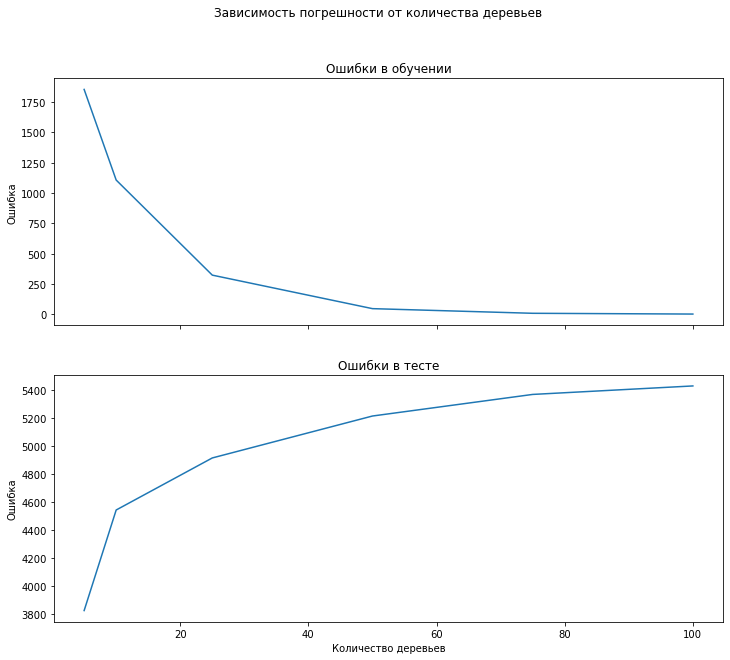

In [20]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 10))
fig.suptitle('Зависимость погрешности от количества деревьев')
ax1.set_title("Ошибки в обучении")
ax2.set_title("Ошибки в тесте")
ax2.set_xlabel('Количество деревьев')
ax1.set_ylabel('Ошибка')
ax2.set_ylabel('Ошибка')
ax1.plot(n_trees_list, train_err_history)
ax2.plot(n_trees_list, test_err_history)
plt.show()

In [25]:
# Модель начинает переобучаться, при увеличении числа деревьев в ансамбле.

In [22]:
# Число деревьев в ансамбле
n_trees = 10

# Максимальная глубина деревьев
max_depths = [2, 4, 6, 8, 10]

# Шаг
eta = 1

train_err_history_depth = []
test_err_history_depth = []

for max_depth in max_depths:    
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)
    
    train_prediction = gb_predict(X_train, trees, eta)
    test_prediction = gb_predict(X_test, trees, eta)
    
    train_err_history_depth.append(mean_squared_error(y_train, train_prediction))
    test_err_history_depth.append(mean_squared_error(y_test, test_prediction))

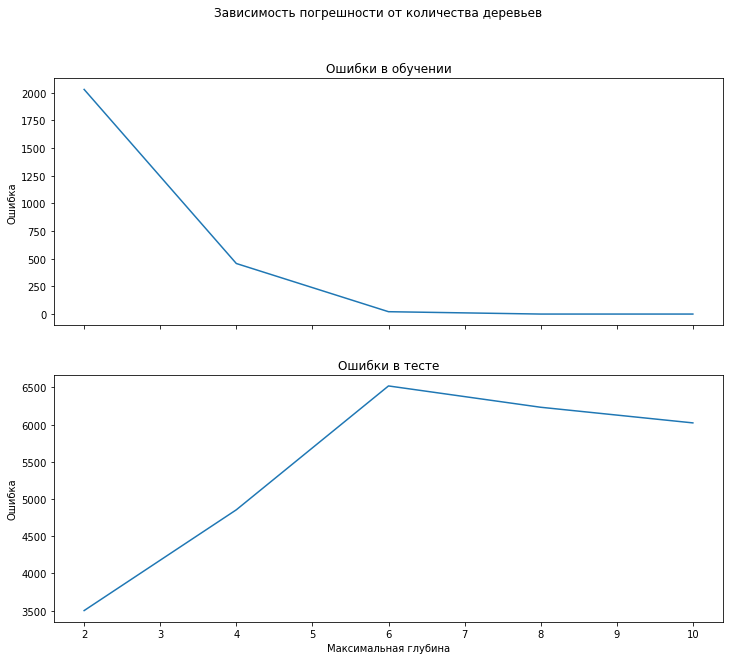

In [23]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 10))
fig.suptitle('Зависимость погрешности от количества деревьев')
ax1.plot(max_depths, train_err_history_depth)
ax2.plot(max_depths, test_err_history_depth)
ax1.set_title("Ошибки в обучении")
ax2.set_title("Ошибки в тесте")
ax2.set_xlabel('Максимальная глубина')
ax1.set_ylabel('Ошибка')
ax2.set_ylabel('Ошибка')
plt.show()

In [ ]:
# Модель начинается переобучаться, при увеличении максимальной глубины деревьев.